Class02

Group: Seunghyeon (Hyeon) Kim

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

plt.style.use('seaborn-poster')

<ipython-input-2-d38f58c5e85b>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


## Tutorials

* solve_ivp:
   *  https://pundit.pratt.duke.edu/wiki/Python:Ordinary_Differential_Equations
   * https://pythonnumericalmethods.studentorg.berkeley.edu/notebooks/chapter22.06-Python-ODE-Solvers.html
* seaborn styles:      https://zhauniarovich.com/post/2022/2022-12-styling-matplotlib-graphs-with-seaborn/       

## Exponential decay

In [ ]:
# ds/dt = F(t,s)

def F(t,s):
  return(-s)



In [ ]:
t_eval = np.arange(0,1.01,0.01)
sol = solve_ivp(F, t_span=[0,1], y0=[1], t_eval=t_eval)


In [ ]:
def plot(sol):
  plt.figure(figsize=(12,4))
  plt.subplot(121)
  plt.plot(sol.t,sol.y[0])
  plt.xlabel('t')

  plt.subplot(122)
  plt.plot(sol.t,sol.y[1])
  plt.xlabel('t')

  plt.tight_layout()
  plt.show()

IndexError: index 1 is out of bounds for axis 0 with size 1

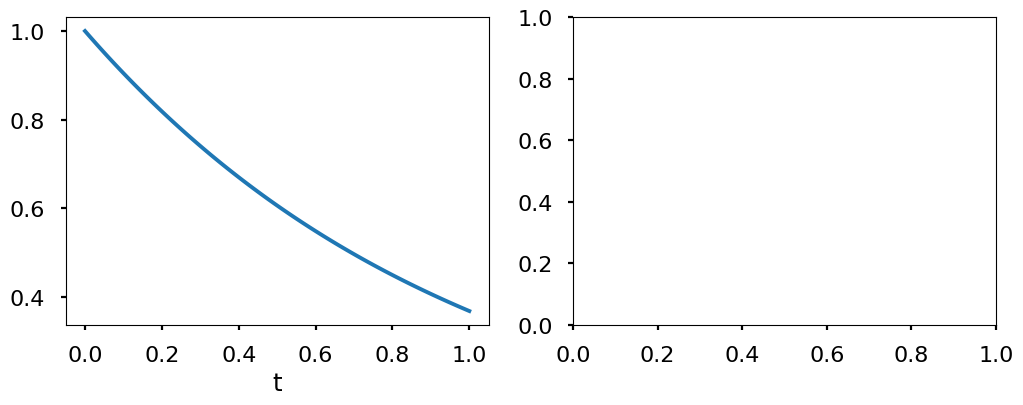

In [ ]:
plot(sol)


In [ ]:
t_eval = np.arange(0,1.01,0.01)
sol = solve_ivp(F, t_span=[0,1], y0=[1], t_eval=t_eval, atol=1e-8, rtol=1e-8)


IndexError: index 1 is out of bounds for axis 0 with size 1

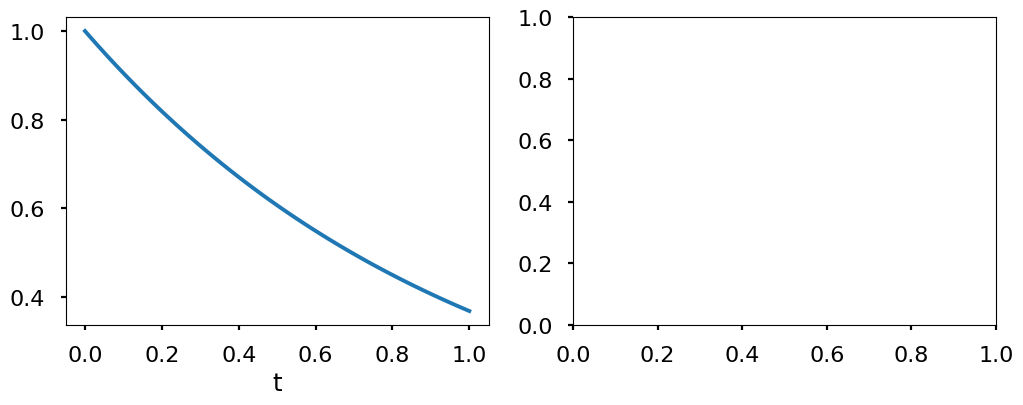

In [ ]:
plot(sol)

## ODE systems

In [ ]:
# Lorenz attractor:
# dx/dt = sigma * (y - x)
# dy/dt = rho * x - x * z - y
# dz/dt = x * y - beta * z

# s = (x,y,z)

def F2(t,s):
        x,y,z = s[0], s[1], s[2]
        return ([
            sigma * (y - x),
            rho * x - x * z - y,
            x * y - beta * z
        ])

In [ ]:
sigma=10
rho=28
beta=8/3

t_eval = np.arange(0,30.01,0.01)
sol = solve_ivp(F2, t_span=[0,30], y0=[1,0,0], t_eval=t_eval, atol=1e-8, rtol=1e-8)

In [ ]:
def plot3d(sol):
  plt.figure(figsize=(12,4))
  plt.subplot(131)
  plt.plot(sol.t,sol.y[0])
  plt.xlabel('t')
  plt.ylabel('x')

  plt.subplot(132)
  plt.plot(sol.t,sol.y[1])
  plt.xlabel('t')
  plt.ylabel('y')

  plt.subplot(133)
  plt.plot(sol.t,sol.y[2])
  plt.xlabel('t')
  plt.ylabel('z')

  plt.tight_layout()
  plt.show()

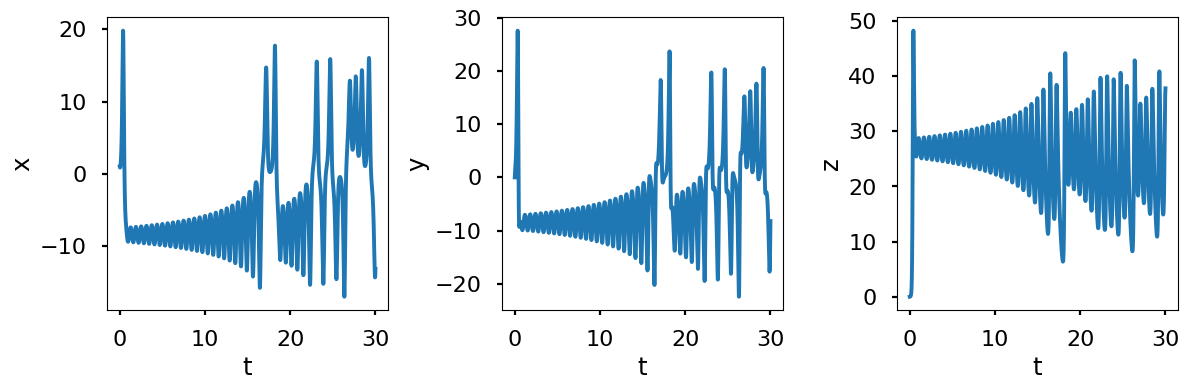

In [ ]:
plot3d(sol)

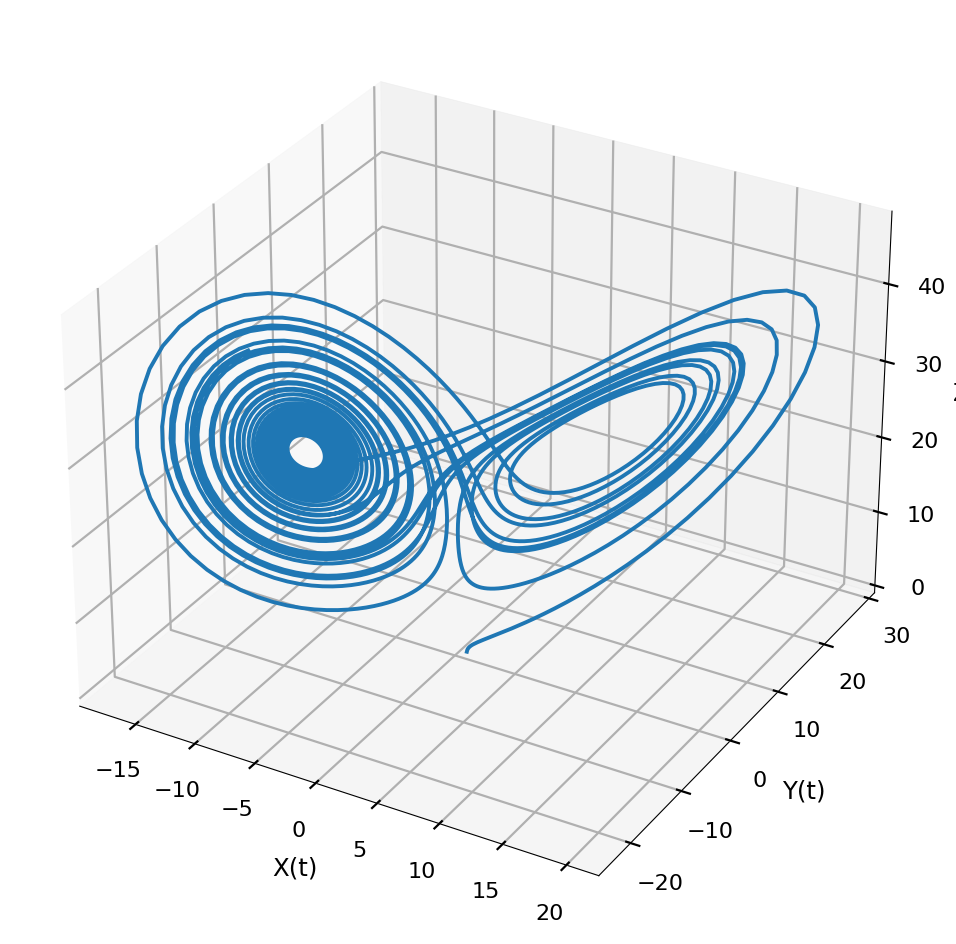

In [ ]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.plot(sol.y[0], sol.y[1], sol.y[2])
ax.set_xlabel('X(t)', labelpad=20)
ax.set_ylabel('Y(t)', labelpad=20)
ax.set_zlabel('Z(t)', labelpad=20)
plt.show()

## Exercises
1. Simulate the irreversible association A + B -> P
2. Simulate the reversible association A + B <-> P
3. Simulate protein accumulation assuming a "constitutively active" (always "on") promoter
4. Simulate protein accumulation assuming a promoter under the control of a transcription factor "A"
5. Simulate the full ODE system of the circadian clock oscillator model

In [19]:
def plotnd(sol, n):
  plt.figure(figsize=(12*n,4))

  for i in range(n):
    plt.subplot(130+10*n+i+1)
    plt.plot(sol.t,sol.y[i])
    plt.xlabel('t')
    plt.ylabel('x'+str(i))

  plt.tight_layout()
  plt.show()

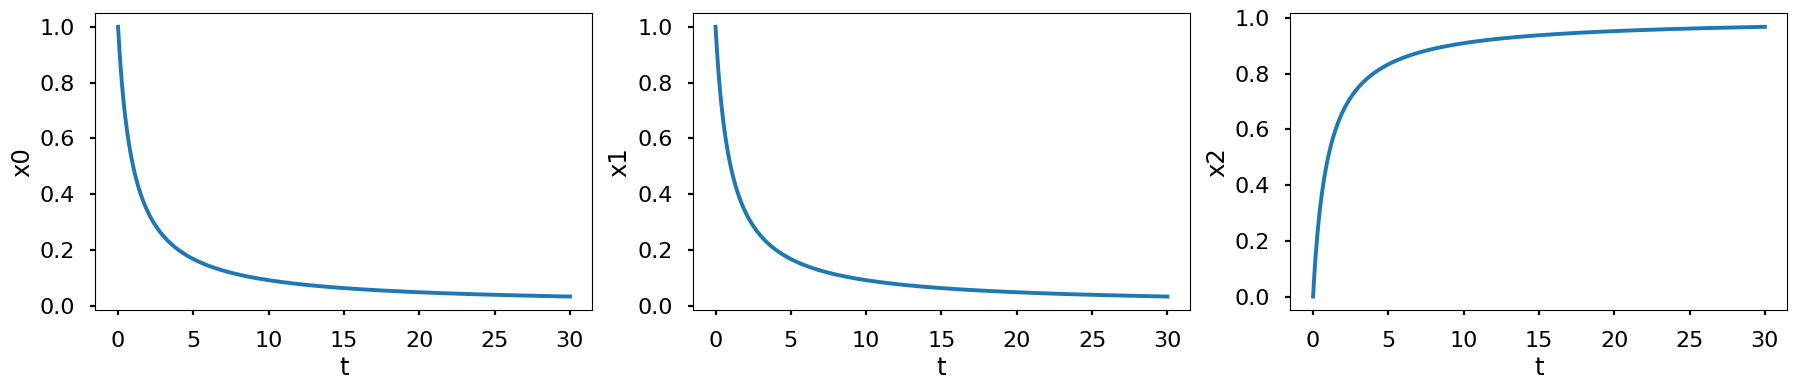

In [20]:
# 1.
# ds/dt = F(t,s)

def PF1(t,s):
        a,b,p = s[0], s[1], s[2]
        return ([-a*b, -a*b, a*b])


t_eval = np.arange(0,30.01,0.01)
sol = solve_ivp(PF1, t_span=[0,30], y0=[1,1,0], t_eval=t_eval, atol=1e-8, rtol=1e-8)

plotnd(sol, 3)

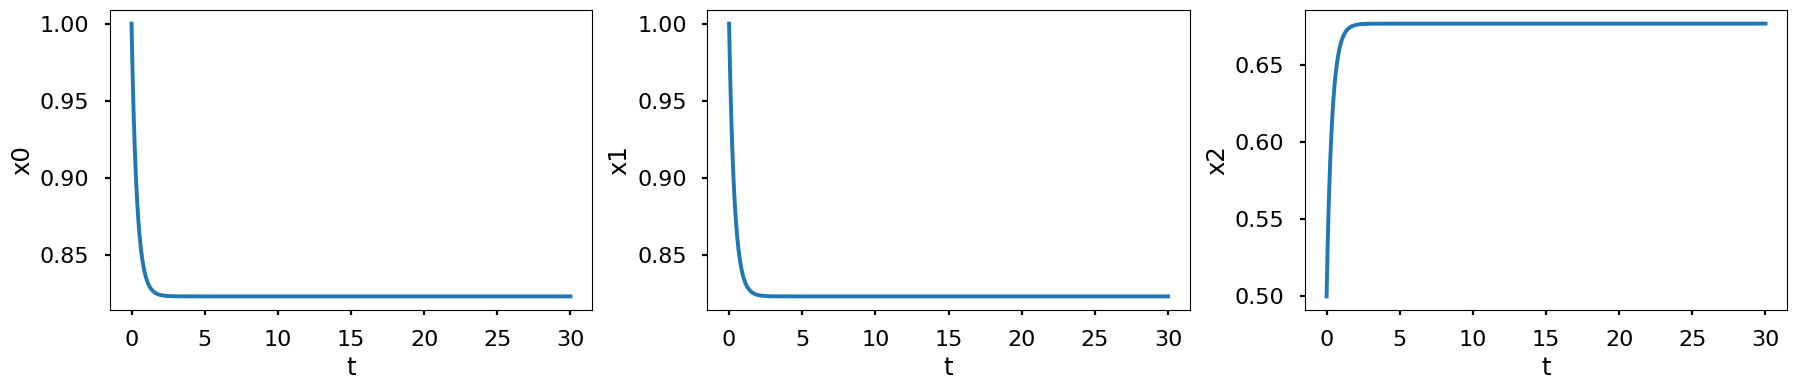

In [21]:
# 2.

def PF2(t,s):
        a,b,p = s[0], s[1], s[2]
        return ([-a*b+p, -a*b+p, a*b-p])


t_eval = np.arange(0,30.01,0.01)
sol = solve_ivp(PF2, t_span=[0,30], y0=[1,1,0.5], t_eval=t_eval, atol=1e-8, rtol=1e-8)

plotnd(sol, 3)

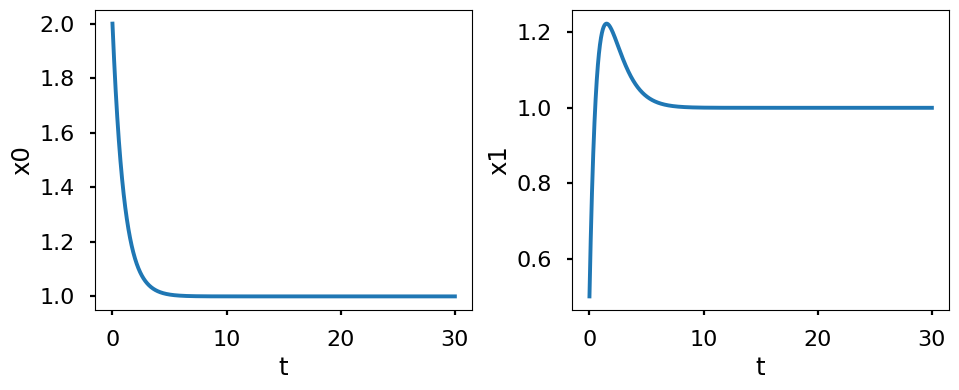

In [22]:
# 3. Simulate protein accumulation assuming a "constitutively active" (always "on") promoter

def PF3(t,s):
        D_A = 1
        M_A, A = s[0], s[1]
        return ([
            alpha_A*D_A-delta_M_A*M_A, #dM_A/dt
            beta_A*M_A-A*(delta_A) #dA/dt
            ])

alpha_A = 1
delta_M_A = 1
beta_A = 1
delta_A = 1

t_eval = np.arange(0,30.01,0.01)
sol = solve_ivp(PF3, t_span=[0,30], y0=[2,0.5], t_eval=t_eval, atol=1e-9, rtol=1e-9)

plotnd(sol, 2)

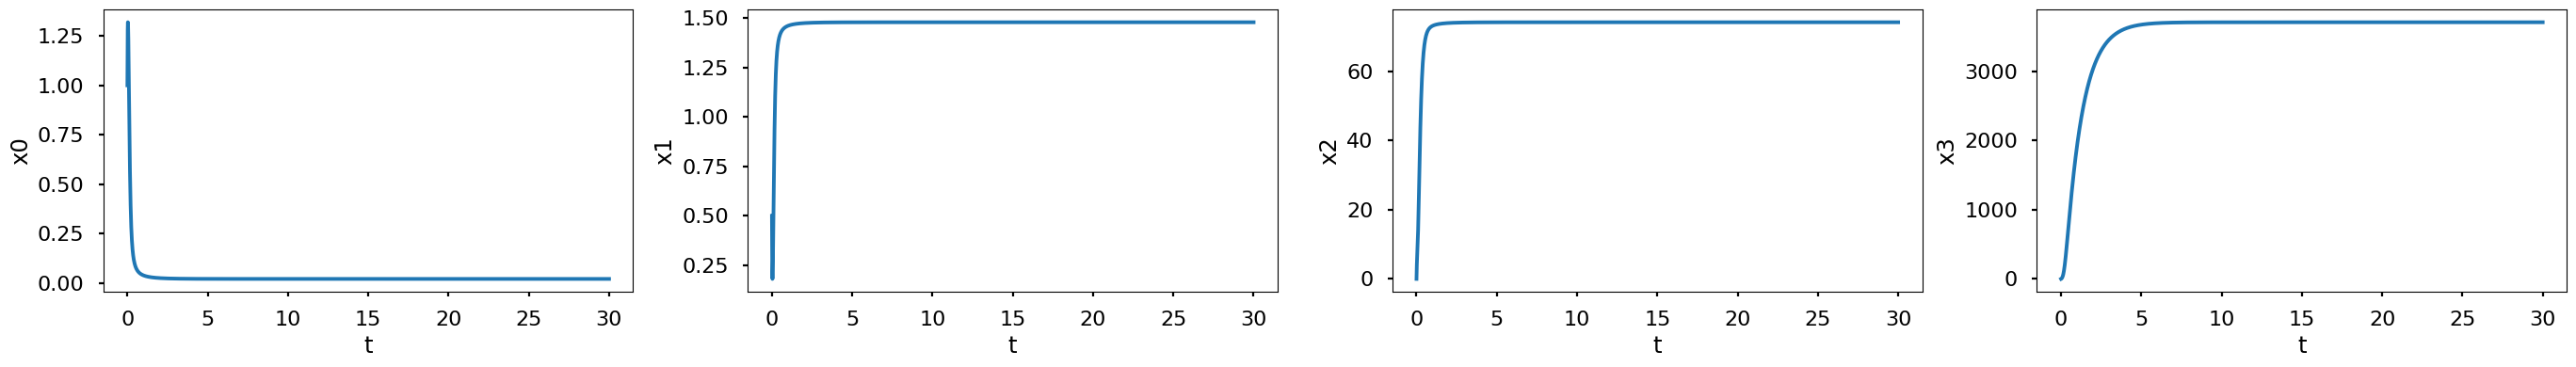

In [23]:
# 4. Simulate protein accumulation assuming a promoter under the control of a transcription factor "A"

def PF4(t,s):
        D_A,D_AP,M_A,A = s[0], s[1], s[2], s[3]
        return ([
            theta_A*D_AP-gamma_A*D_A*A, #dD_A/dt
            gamma_A*A*D_A-theta_A*D_AP, #dD_AP/dt
            alpha_AP*D_AP+alpha_A*D_A-delta_M_A*M_A, #dM_A/dt
            beta_A*M_A+theta_A*D_AP-A*(gamma_A*D_A+delta_A)#dA/dt
            ])

gamma_A = 1
alpha_A = 50
delta_M_A = 10
theta_A = 50
alpha_AP = 500
beta_A = 50

t_eval = np.arange(0,30.01,0.01)
sol = solve_ivp(PF4, t_span=[0,30], y0=[1,0.5,0,1], t_eval=t_eval, atol=1e-8, rtol=1e-8)

plotnd(sol, 4)

In [24]:
alpha_A = 50
alpha_AP = 500
alpha_R = 0.01
alpha_RP = 50
beta_A = 50
beta_R = 5

delta_A = 1
delta_M_A = 10
delta_R = 0.2
delta_M_R = 0.5
gamma_R = 1
gamma_C = 1
gamma_A = 1

theta_A = 50
theta_R = 100

In [55]:
def plotnd(sol, n):
  figure, axis = plt.subplots(n//2+n%2, 2)

  for i in range(n):
    axis[i//2,i%2].plot(sol.t,sol.y[i])
  plt.tight_layout()
  plt.show()

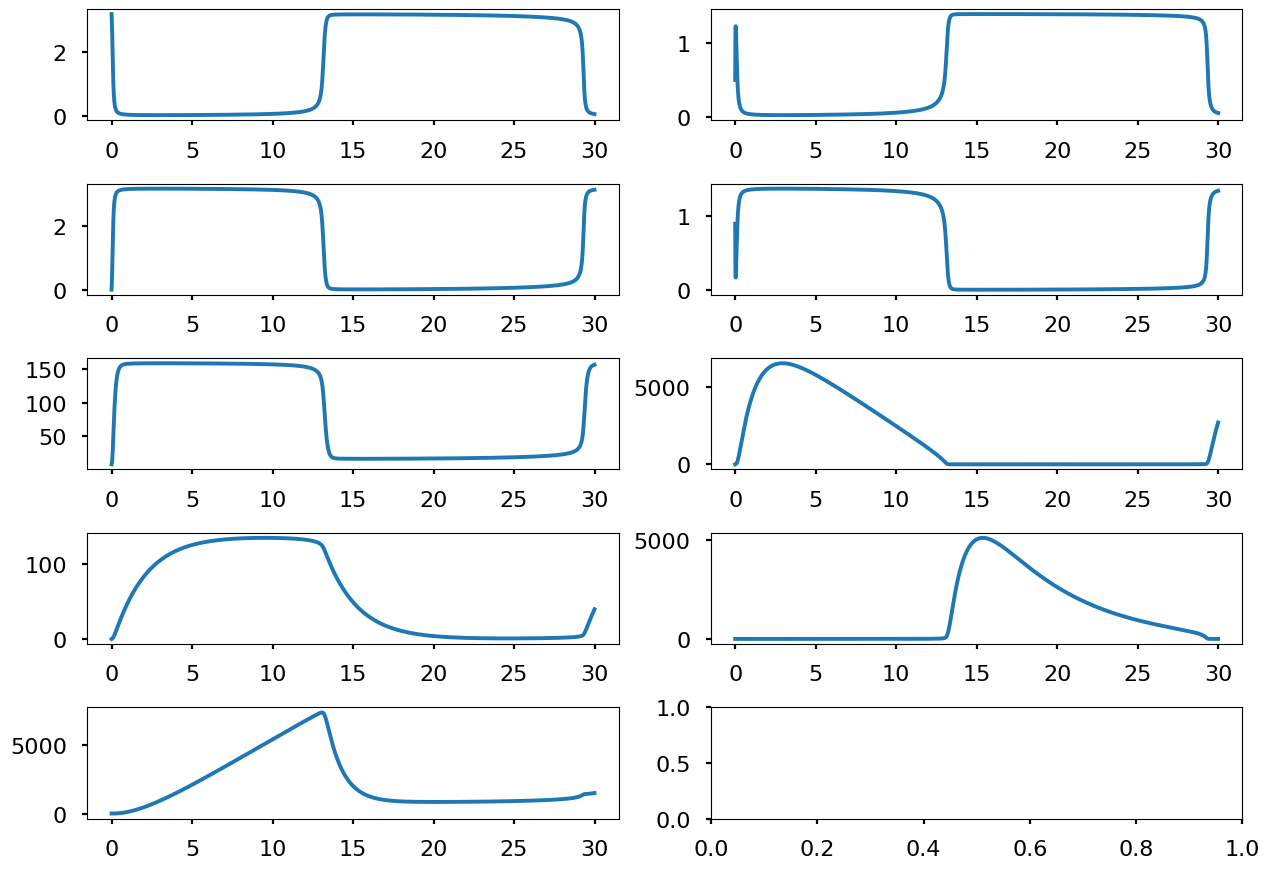

In [56]:
# 5. Simulate the full ODE system of the circadian clock oscillator model
# Take out the effect of D_A,D_AP,D_R,D_RP

def PF5(t,s):
        D_A,D_R,D_AP,D_RP,M_A,A,M_R,R,C = s[0], s[1], s[2], s[3], s[4], s[5], s[6], s[7], s[8]
        return ([
            theta_A*D_AP-gamma_A*D_A*A, #dD_A/dt
            theta_R*D_RP-gamma_R*D_R*A, #dD_R/dt
            gamma_A*A*D_A-theta_A*D_AP, #dD_AP/dt
            gamma_R*A*D_R-theta_R*D_RP, #dD_RP/dt
            alpha_AP*D_AP+alpha_A*D_A-delta_M_A*M_A, #dM_A/dt
            beta_A*M_A+theta_A*D_AP+theta_R*D_RP-A*(gamma_A*D_A+gamma_R*D_R+gamma_C*R+delta_A), #dA/dt
            alpha_RP*D_RP+alpha_R*D_R-delta_M_R*M_R, #dM_R/dt
            beta_R*M_R-gamma_C*R*A+delta_A*C-delta_R*R, #dR/dt
            gamma_C*R*A-delta_A*C #dC/dt
            ])

t_eval = np.arange(0,30.01,0.01)
sol = solve_ivp(PF5, t_span=[0,30], y0=[3.2,0.5,0,0.9,8.2,0.4,0.6,0.7,0.2], t_eval=t_eval, atol=1e-8, rtol=1e-8)
plotnd(sol, 9)